In [21]:
!pip install pandas

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)


In [25]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

# Concatenate the three DataFrames
combined_train_targets = pd.concat([train_a, train_b, train_c], ignore_index=True)

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

# Concatenate the three DataFrames
combined_train_estimated = pd.concat([X_train_estimated_a, X_train_estimated_b, X_train_estimated_c], ignore_index=True)

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

# Concatenate the three DataFrames
combined_train_observed = pd.concat([X_train_observed_a, X_train_observed_b, X_train_observed_c], ignore_index=True)

# Concatenate observed and estimated
combined_train = pd.concat([combined_train_estimated, combined_train_observed], ignore_index=True)

In [34]:
combined_train = combined_train.rename(columns={"date_forecast": "time"})

# Merging on 'time' to ensure alignment
data = pd.merge(combined_train, combined_train_targets, on='time', how='inner')

# Selecting only numeric features
numeric_features = combined_train.select_dtypes(include=[np.number])

# Initializing a dictionary to hold correlation values
correlations = {}

# Iterating through each numeric feature and calculating correlation with 'pv_measurement'
for column in numeric_features.columns:
    correlations[column] = abs(data['pv_measurement'].corr(data[column]))

# Converting to a Pandas Series for easier analysis
correlation_series = pd.Series(correlations)

# Sorting the correlations
sorted_correlations = correlation_series.sort_values(ascending=False)

# Displaying the sorted correlations
print(sorted_correlations)


direct_rad:W                      0.606533
direct_rad_1h:J                   0.589759
clear_sky_rad:W                   0.584823
clear_sky_energy_1h:J             0.569895
diffuse_rad:W                     0.508895
diffuse_rad_1h:J                  0.498765
sun_elevation:d                   0.484871
is_in_shadow:idx                  0.411945
is_day:idx                        0.376442
t_1000hPa:K                       0.266221
air_density_2m:kgm3               0.262180
relative_humidity_1000hPa:p       0.249200
dew_point_2m:K                    0.202077
absolute_humidity_2m:gm3          0.201454
wind_speed_v_10m:ms               0.192977
effective_cloud_cover:p           0.140771
pressure_100m:hPa                 0.130320
visibility:m                      0.130042
msl_pressure:hPa                  0.126984
pressure_50m:hPa                  0.126689
sfc_pressure:hPa                  0.123053
total_cloud_cover:p               0.120071
ceiling_height_agl:m              0.116811
cloud_base_

In [36]:
selected_features = [
    "direct_rad:W",
    "direct_rad_1h:J",
    "clear_sky_rad:W",
    "clear_sky_energy_1h:J",
    "diffuse_rad:W",
    "diffuse_rad_1h:J",
    "sun_elevation:d",
    "is_in_shadow:idx"
]

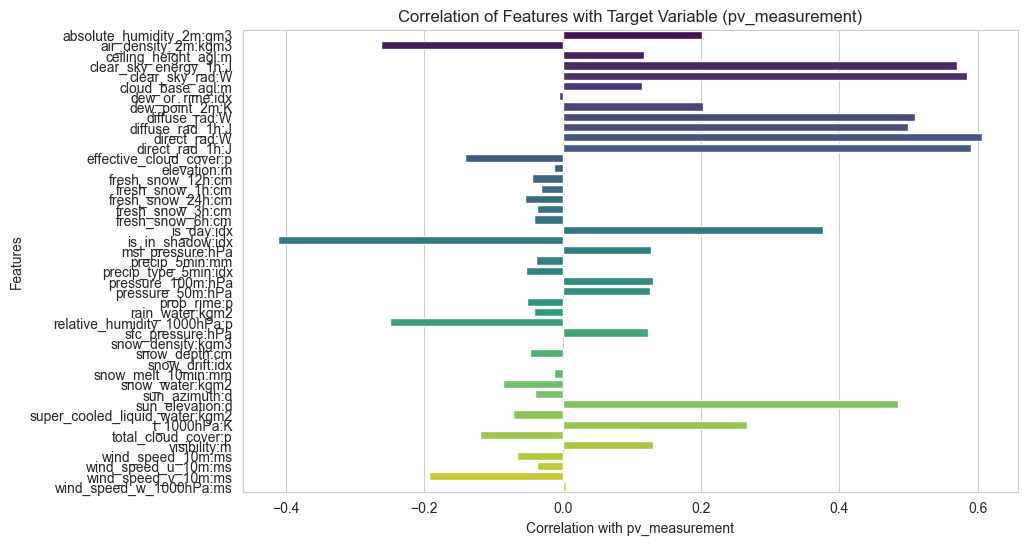

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of correlations
sns.barplot(x=correlation_series.values, y=correlation_series.index, palette="viridis")

# Add labels and title
plt.xlabel('Correlation with pv_measurement')
plt.ylabel('Features')
plt.title('Correlation of Features with Target Variable (pv_measurement)')

# Display the plot
plt.show()
